In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your dataset file path)
file_path = "US_Accidents_March23.csv"  # Ensure the dataset is downloaded
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
# Ensure datetime format with error handling
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')

# Drop rows with invalid datetime values (NaT)
data = data.dropna(subset=['Start_Time'])

# Extract time-based features
data['Hour'] = data['Start_Time'].dt.hour
data['Day_of_Week'] = data['Start_Time'].dt.day_name()
data['Month'] = data['Start_Time'].dt.month_name()

# Check the cleaned data
data.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Day_of_Week,Month
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,Night,Night,Night,Night,5,Monday,February
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,Night,Night,Night,Day,6,Monday,February
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,True,False,Night,Night,Day,Day,6,Monday,February
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,Night,Day,Day,Day,7,Monday,February
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,True,False,Day,Day,Day,Day,7,Monday,February


In [4]:
print(data.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'Day_of_Week', 'Month'],
      dtype='object')


In [5]:
%matplotlib inline


In [6]:
columns_to_keep = ['Start_Time', 'Hour']  # Adjust based on your analysis
data = data[columns_to_keep]

In [7]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')
data = data.dropna(subset=['Start_Time'])  # Drop rows with invalid datetime values
data['Hour'] = data['Start_Time'].dt.hour 

In [8]:
sampled_data = data.sample(frac=0.1, random_state=42)  # Use 10% of the data


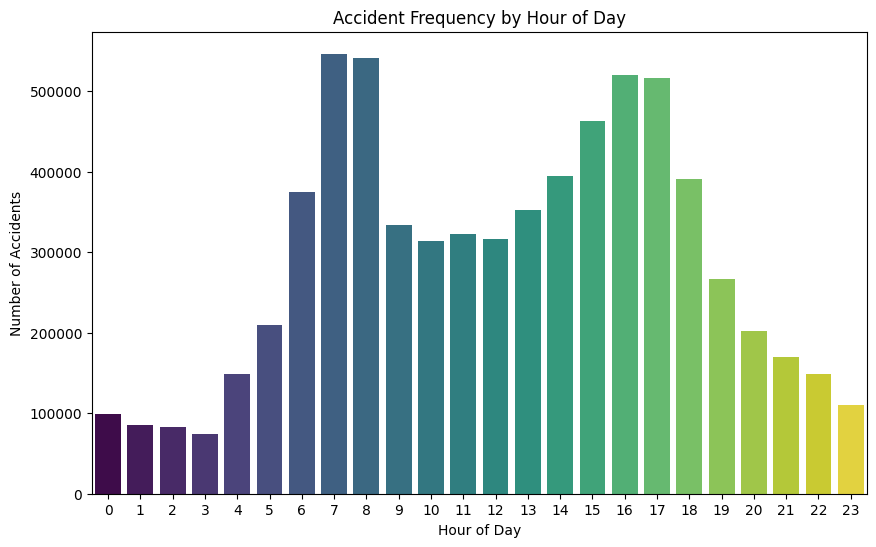

In [9]:
# 1. Accident frequency by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Hour', hue='Hour', palette='viridis', legend=False)
plt.title('Accident Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(24))
plt.show()


In [10]:
print(data.columns)


Index(['Start_Time', 'Hour'], dtype='object')


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('US_Accidents_March23.csv')  


In [6]:
# 2. Accident frequency by road conditions
if 'Road_Conditions' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=data, 
        y='Road_Conditions', 
        order=data['Road_Conditions'].value_counts().index, 
        palette='coolwarm', 
        hue='Road_Conditions', 
        dodge=False
    )
    plt.title('Accident Frequency by Road Conditions')
    plt.xlabel('Number of Accidents')
    plt.ylabel('Road Conditions')
    plt.legend([], frameon=False)  # Removes legend
    plt.show()
else:
    print("The column 'Road_Conditions' is missing.")


The column 'Road_Conditions' is missing.


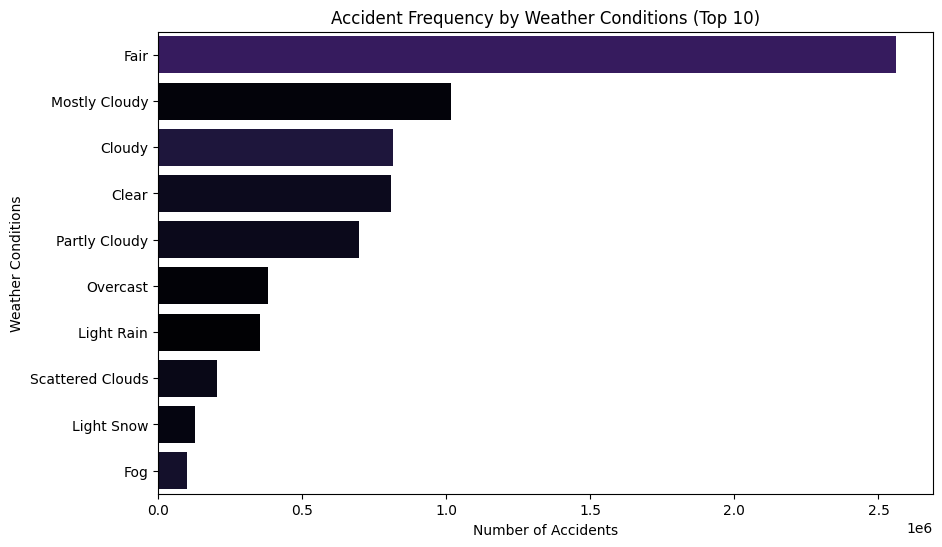

In [7]:
# 3. Accident frequency by weather conditions
if 'Weather_Condition' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=data, 
        y='Weather_Condition', 
        order=data['Weather_Condition'].value_counts().index[:10], 
        palette='magma', 
        hue='Weather_Condition', 
        dodge=False
    )
    plt.title('Accident Frequency by Weather Conditions (Top 10)')
    plt.xlabel('Number of Accidents')
    plt.ylabel('Weather Conditions')
    plt.legend([], frameon=False)  # Removes legend
    plt.show()
else:
    print("The column 'Weather_Condition' is missing.")
